# 의사결정나무(Decision Tree)

## 가. 의사결정나무 모형
1) 일련의 독립변수들을 활용하여 분류를 하거나 예측을 수행하는 기법 <br>
2) 최정 결과물이 "일련의 규칙들"로 표현됨 <br>
3) Decision Trees 또는 Trees라고 불림 <br>

## 나. 의사결정나무의 2가지 기본 아이디어
1) 반복적 분할(Recursive partitioning)
- 레코드들을 두 부분으로 반복해서 잘라 세분된 영역 내의 동질성이 최대가 되도록 함
- 계속 잘라나가다 보면 모든 학습용 데이터를 100% 정확하게 분류해 낼 수 있을 만큼 세분화 해 나갈 수 있음

2) 분류나무의 가지치기(Pruning the tree)
- 앞서 설명한 반복적 분할을 반복하다 보면 과적합화는 피할 수 없이 나타나게 됨
- 과적합화를 피하기 위해 불필요한 가지를 제거함으로써 나무를 단순화하는 작업이 이루어지게 됨

## 다. 과적합화의 해소 방법

1) CHAID (chi-squared automatic interaction detection)
- 카이제곱 검정을 적용해, 적당한 수준에서 나무의 성장을 중단시키는 기법

2) CART
- 일단 나무를 최대한 성장시킨 다음, 가지치기를 수행
- 학습용 데이터로 나무를 성장시키고, 평가용 데이터(검정용 데이터)로 가지치기를 수행

3) C5.0
- 일단 나무를 최대한 성장시킨 다음, 가지치기를 수행
- 학습용 데이터가 나무의 성장과 가지치기에 모두 사용

In [11]:
# 사이킷런 패키지 로딩
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 넘파이 패키지
import numpy as np

In [12]:
# 붓꽃 데이터 로딩
iris = datasets.load_iris()

In [13]:
# 데이터의 key 확인
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
# 데이터셋에 대한 설명, 앞부분
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
# 우리가 예측하려는 붓꽃 품종의 이름
print("타깃의 이름: {}".format(iris['target_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']


In [16]:
print("특성의 이름: {}".format(iris['feature_names']))

특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [17]:
# 데이터의 크기 : 150행 4열
print("data의 크기: {}".format(iris['data'].shape))

data의 크기: (150, 4)


In [18]:
print("data의 처음 다섯 행:\n{}".format(iris['data'][:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
import pandas as pd
# 데이터셋을 판다스의 데이터프레임으로 변환
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df['result'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [22]:
# 2, 3 열만 선택(3, 4번째 필드)
X = iris.data[:, [2, 3]]
y = iris.target
# 자동으로 데이터셋을 분리해주는 함수(학습용 7: 검증용 3)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
# 데이터 표준화 작업(0.0 ~ 1.0 사이의 값으로 표준화)
sc = StandardScaler()
sc.fit(X_train)
# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train[:5])
print(X_train_std[:5])

[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]]
[[-0.18295039 -0.29318114]
 [ 0.93066067  0.7372463 ]
 [ 1.04202177  1.63887031]
 [ 0.6522579   0.35083601]
 [ 1.09770233  0.7372463 ]]


In [23]:
from sklearn.tree import DecisionTreeClassifier
# 트리 모델 생성
# criterion = 'entropy' 분류 알고리즘의 종류
iris_tree = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(\
iris_tree.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(\
iris_tree.score(X_test, y_test)))

학습용 데이터셋 정확도: 0.981
검증용 데이터셋 정확도: 0.978


In [24]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

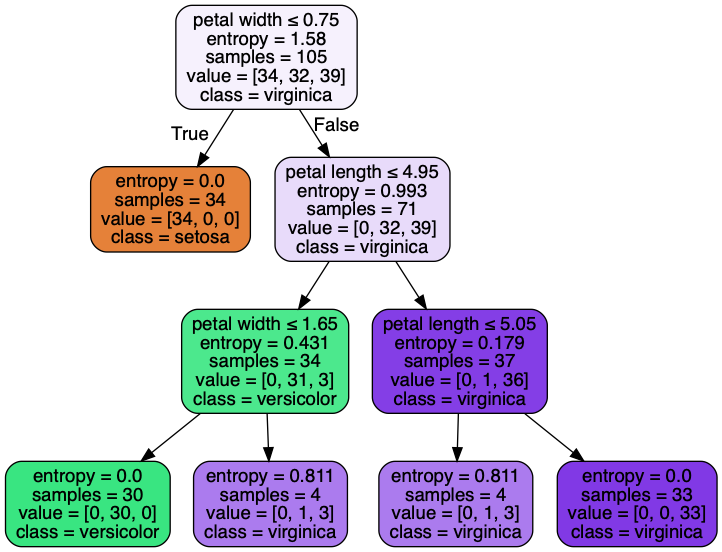

In [28]:
import os

# 환경변수 path에 graph viz의 실행 파일 디렉토리를 추가
os.environ["PATH"] +=\
os.pathsep + "/usr/local/bin/"

dot_data = export_graphviz(iris_tree, out_file=None,
feature_names=['petal length', 'petal width'],
class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# 그래프 생성
graph = pydotplus.graph_from_dot_data(dot_data)
# 그래프를 이미지로 변환
Image(graph.create_png())

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
import pandas as pd
import numpy as np
from matplotlib import rc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 한글 처리를 위해 폰트 설정
rc('font', family='AppleGothic')
# 음수 부호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [30]:
from sklearn.datasets import load_breast_cancer
# 데이터셋 로딩
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [31]:
# 569개의 데이터, 특성 30개
print("cancer 데이터의 형태: {}".format(cancer.data.shape))

cancer 데이터의 형태: (569, 30)


In [32]:
# 악성 212개, 양성 357개
print("클래스별 샘플 갯수:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [33]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
from sklearn.model_selection import train_test_split
# 학습용, 검증용 데이터셋을 75:25로 구분
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [35]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 트리 모델 생성
tree = DecisionTreeClassifier(random_state=0)
# 학습용 데이터로 기계학습 실시
tree.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(tree.score(X_test, y_test)))

# 학습용 데이터셋은 100%의 성과가 나옴
# 가지치기하지 않은 트리는 과적합화 되기 쉬움

학습용 데이터셋 정확도: 1.000
검증용 데이터셋 정확도: 0.895


In [36]:
# 최대 질문을 4로 해서 가지치기(max_depth 속성)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터셋 정확도: 0.988
검증용 데이터셋 정확도: 0.902


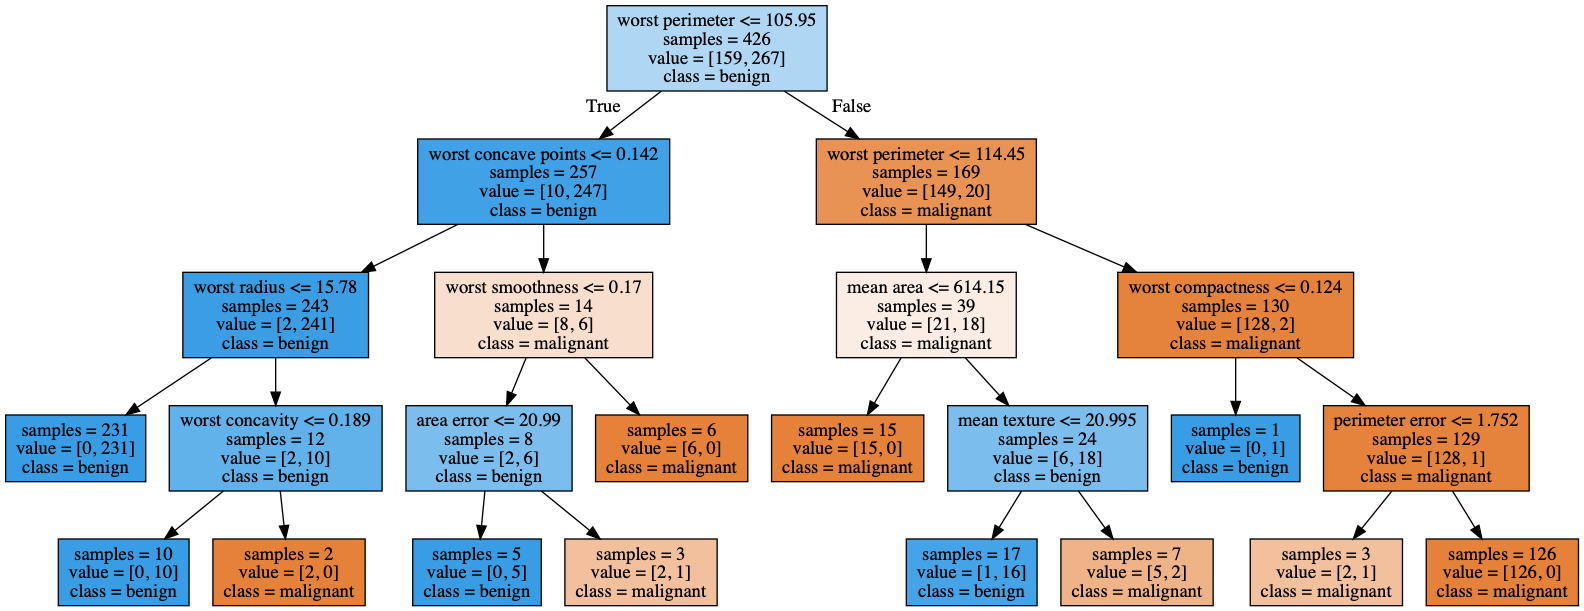

In [37]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
# class_names=["malignant", "benign"] 악성, 양성
dot_data = export_graphviz(tree, out_file=None,
                          class_names=["malignant", "benign"],
                          feature_names=cancer.feature_names,
                          impurity=False, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

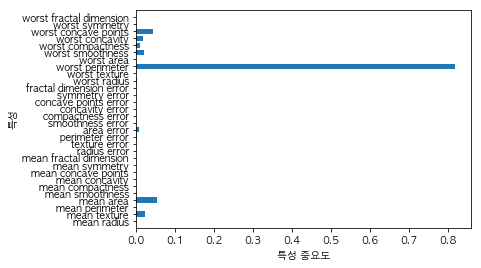

In [38]:
# 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
# 0~1 사이의 값
# 0 : 전혀 사용되지 않음
# 1 : 완벽하게 타겟 클래스 예측
def plot_feature_cancer(model):
    n_features = cancer.data.shape[1] # 필드(변수)의 갯수
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_cancer(tree)

In [40]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 100개의 트리로 이루어진 랜덤 포레스트
# 기본 설정만으로도 좋은 결과를 얻을 수도 있다.
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("학습용 데이터셋 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("검증용 데이터셋 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터셋 정확도: 1.000
검증용 데이터셋 정확도: 0.972


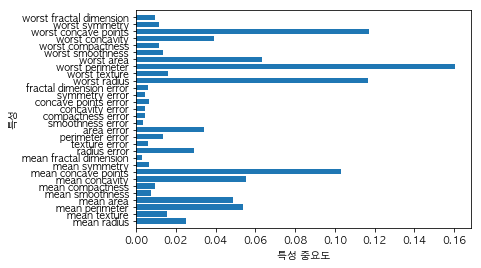

In [41]:
# 랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
plot_feature_cancer(forest)
# worst radius보다 worst perimeter 특성이 더 중요한 것으로 나타남
# (가장 많은 정보를 가진 특성)
# 랜덤 포레스트는 더 넓은 시각으로 데이터를 바라볼 수 있다.

In [43]:
# 의사결정나무의 단점 : 과거의 데이터는 잘 맞추지만 새로운 데이터에 대한 예측력이 떨어짐
# 과적합화를 방지할 수 있는 대표적인 방법 중 하나가 랜덤포레스트
# 여러개의 의사결정나무를 만들고 투표를 통해 다수결로 결과를 결정함
# 처리가 빠르고 분류 정밀도가 높다.
# 버섯 데이터, 독버섯 여부
# 첫번째 컬럼; 독의 여부(독이 있으면 p, 식용이면 e)
# import urllib.request as req
# local = "./data/mushroom.csv"
# url = \
# "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
# # 데이터 다운로드
# req.urlretrieve(url, local)
# print("다운로드가 완료되었습니다.")

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
# 데이터 로딩
mr = pd.read_csv("./data/mushroom.csv", header=None)
# 데이터 내부의 기호를 숫자로 변환
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    # 첫번째 필드(p 독버섯, e 식용)
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        # 문자를 숫자코드로 변환
        row_data.append(ord(v))
    data.append(row_data)
    
# 학습용 데이터셋과 검증용 데이터셋으로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

# 데이터 학습
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# 데이터 예측
predict = clf.predict(data_test)

# 결과 테스트
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 :", ac_score)
print("리포트 :\n", cl_report)
# 100% 분류 성공

정답률 : 1.0
리포트 :
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1054
           p       1.00      1.00      1.00       977

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



/Users/kyeongmin/anaconda3/envs/django/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
